In [1]:
import torch
from torch import nn
import utils
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import re

In [2]:
data_dir_path = Path('../data/california_house_prices')
train_csv_path = data_dir_path / 'train.csv'
test_csv_path = data_dir_path / 'test.csv'

In [3]:
train_df = pd.read_csv(train_csv_path.as_posix())
test_df = pd.read_csv(test_csv_path.as_posix())
train_df.shape, test_df.shape

((47439, 41), (31626, 40))

In [4]:
train_df.head(5)

,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,0,540 Pine Ln,3825000.0,"540 Pine Ln, Los Altos, CA 94022 is a single f...",SingleFamily,1969.0,"Heating - 2+ Zones, Central Forced Air - Gas","Multi-Zone, Central AC, Whole House / Attic Fan","Garage, Garage - Attached, Covered",1.0,...,"Garage, Garage - Attached, Covered",886486.0,12580.0,2019-10-24,4198000.0,NaN,NaN,Los Altos,94022,CA
1,1,1727 W 67th St,505000.0,"HURRY, HURRY.......Great house 3 bed and 2 bat...",SingleFamily,1926.0,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...","Detached Carport, Garage",4047.0,...,"Detached Carport, Garage",505000.0,6253.0,2019-10-16,525000.0,2019-08-30,328000.0,Los Angeles,90047,CA
2,2,28093 Pine Ave,140000.0,'THE PERFECT CABIN TO FLIP! Strawberry deligh...,SingleFamily,1958.0,Forced air,NaN,0 spaces,9147.0,...,NaN,49627.0,468.0,2019-08-25,180000.0,NaN,NaN,Strawberry,95375,CA
3,3,10750 Braddock Dr,1775000.0,Rare 2-story Gated 5 bedroom Modern Mediterran...,SingleFamily,1947.0,Central,Central Air,"Detached Carport, Driveway, Garage - Two Door",NaN,...,"Detached Carport, Driveway, Garage - Two Door",1775000.0,20787.0,2019-10-24,1895000.0,2016-08-30,1500000.0,Culver City,90230,CA
4,4,7415 O Donovan Rd,1175000.0,Beautiful 200 acre ranch land with several pas...,VacantLand,NaN,NaN,NaN,0 spaces,NaN,...,NaN,NaN,NaN,2019-06-07,1595000.0,2016-06-27,900000.0,Creston,93432,CA


In [5]:
train_df_no_id = train_df[train_df.columns[1:]]
train_df_no_id.head(5)

,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,Bedrooms,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,540 Pine Ln,3825000.0,"540 Pine Ln, Los Altos, CA 94022 is a single f...",SingleFamily,1969.0,"Heating - 2+ Zones, Central Forced Air - Gas","Multi-Zone, Central AC, Whole House / Attic Fan","Garage, Garage - Attached, Covered",1.0,"Ground Floor Bedroom, Master Bedroom on Ground...",...,"Garage, Garage - Attached, Covered",886486.0,12580.0,2019-10-24,4198000.0,NaN,NaN,Los Altos,94022,CA
1,1727 W 67th St,505000.0,"HURRY, HURRY.......Great house 3 bed and 2 bat...",SingleFamily,1926.0,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...","Detached Carport, Garage",4047.0,3,...,"Detached Carport, Garage",505000.0,6253.0,2019-10-16,525000.0,2019-08-30,328000.0,Los Angeles,90047,CA
2,28093 Pine Ave,140000.0,'THE PERFECT CABIN TO FLIP! Strawberry deligh...,SingleFamily,1958.0,Forced air,NaN,0 spaces,9147.0,2,...,NaN,49627.0,468.0,2019-08-25,180000.0,NaN,NaN,Strawberry,95375,CA
3,10750 Braddock Dr,1775000.0,Rare 2-story Gated 5 bedroom Modern Mediterran...,SingleFamily,1947.0,Central,Central Air,"Detached Carport, Driveway, Garage - Two Door",NaN,5,...,"Detached Carport, Driveway, Garage - Two Door",1775000.0,20787.0,2019-10-24,1895000.0,2016-08-30,1500000.0,Culver City,90230,CA
4,7415 O Donovan Rd,1175000.0,Beautiful 200 acre ranch land with several pas...,VacantLand,NaN,NaN,NaN,0 spaces,NaN,NaN,...,NaN,NaN,NaN,2019-06-07,1595000.0,2016-06-27,900000.0,Creston,93432,CA


In [6]:
train_saleprice_corr = abs(train_df_no_id.corr()['Sold Price']).sort_values(ascending=False)
train_saleprice_corr, train_saleprice_corr.shape

(Sold Price                     1.000000
 Annual tax amount              0.746221
 Tax assessed value             0.743233
 Last Sold Price                0.706779
 Listed Price                   0.612651
 Full bathrooms                 0.544245
 Bathrooms                      0.516208
 Elementary School Score        0.275555
 Middle School Score            0.244285
 High School Score              0.191616
 High School Distance           0.099491
 Elementary School Distance     0.086177
 Middle School Distance         0.059330
 Zip                            0.049961
 Year built                     0.027095
 Garage spaces                  0.009288
 Total spaces                   0.007492
 Lot                            0.006610
 Total interior livable area    0.001520
 Name: Sold Price, dtype: float64,
 (19,))

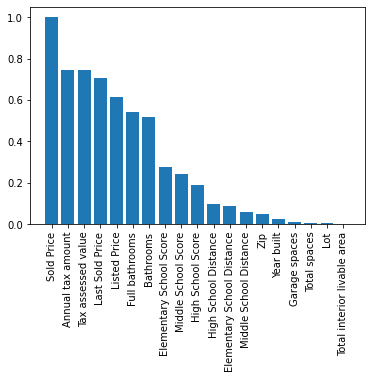

In [7]:
plt.bar(x=train_saleprice_corr.index, height=train_saleprice_corr.values)
plt.xticks(rotation=90)
plt.show()

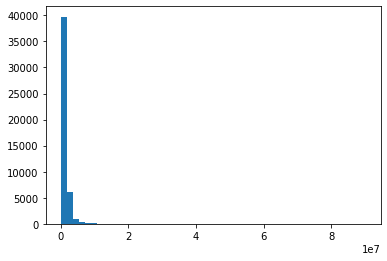

In [8]:
plt.hist(train_df['Sold Price'], bins=50)
plt.show()

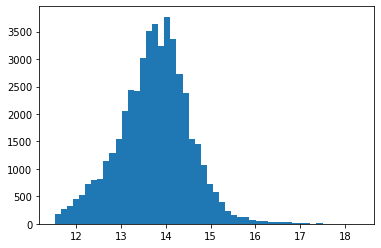

In [9]:
plt.hist(np.log(train_df['Sold Price'] + 1), bins=50)
plt.show()

In [10]:
# 相关性高的9项，可视化
top_9_name = train_saleprice_corr.index[1:10]
top_9_name

Index(['Annual tax amount', 'Tax assessed value', 'Last Sold Price',
       'Listed Price', 'Full bathrooms', 'Bathrooms',
       'Elementary School Score', 'Middle School Score', 'High School Score'],
      dtype='object')

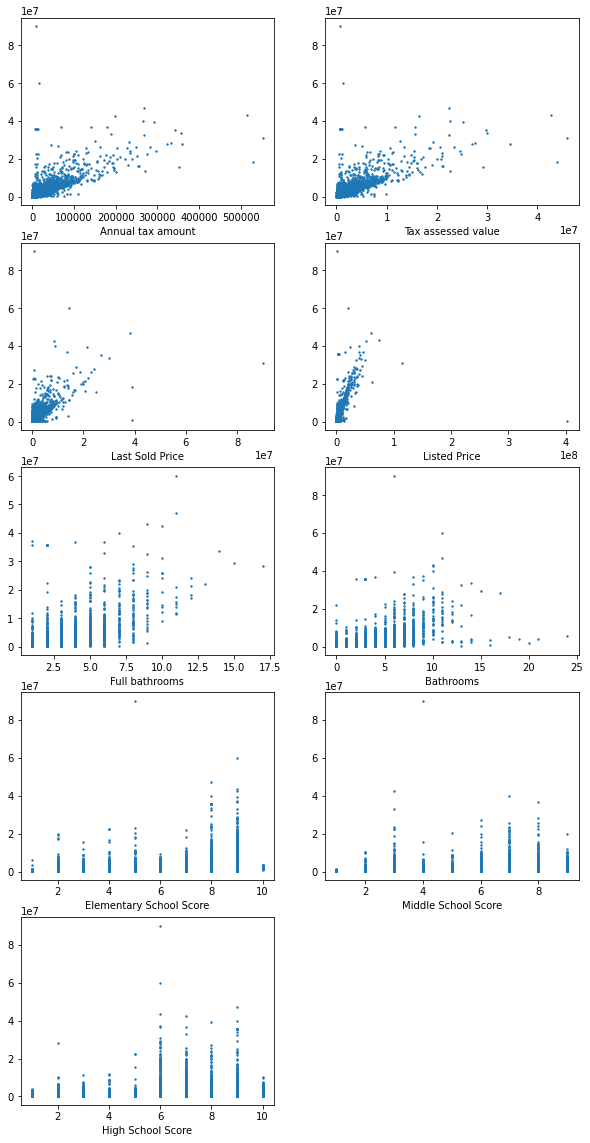

In [11]:
plot_row = 5
plot_col = 2

fig = plt.figure(figsize=(10, 20))
for i in range(plot_row * plot_col - 1):
    plt.subplot(plot_row, plot_col, i+1)
    plt.scatter(x=train_df[top_9_name[i]], y=train_df['Sold Price'], s=2)
    plt.xlabel(top_9_name[i])
plt.show()

In [12]:
# 去除异常值
train_df = train_df.drop(train_df[(train_df['Annual tax amount']<100000) & (train_df['Sold Price']>8e7)].index)
train_df = train_df.drop(train_df[(train_df['Tax assessed value']<0.5e7) & (train_df['Sold Price']>8e7)].index)
train_df = train_df.drop(train_df[(train_df['Last Sold Price']>8e7) & (train_df['Sold Price']<4e7)].index)
train_df = train_df.drop(train_df[(train_df['Listed Price']>4e8) & (train_df['Sold Price']<1e7)].index)
train_df = train_df.drop(train_df[(train_df['Bathrooms']<10) & (train_df['Sold Price']>8e7)].index)
train_df.shape

(47436, 41)

In [13]:
train_df_no_id_label = pd.concat([train_df.iloc[:, 1:2], train_df.iloc[:, 3:]], axis=1)
train_df_no_id_label.shape

(47436, 39)

In [14]:
all_df = pd.concat([train_df_no_id_label, test_df.iloc[:, 1:]], axis=0)
all_df.shape

(79062, 39)

In [15]:
all_df.reset_index(drop=True, inplace=True)

In [16]:
all_df.describe()

,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,Middle School Score,Middle School Distance,High School Score,High School Distance,Tax assessed value,Annual tax amount,Listed Price,Last Sold Price,Zip
count,77120.000000,5.607400e+04,73653.000000,66136.000000,7.518500e+04,77395.000000,77395.000000,70327.000000,70569.000000,50784.000000,50786.000000,71279.000000,71888.000000,7.273900e+04,71853.000000,7.906200e+04,4.951800e+04,79062.000000
mean,1962.740275,3.690900e+05,2.391159,2.100172,4.216058e+03,1.861877,1.690794,5.710126,1.141058,5.250000,1.710716,6.160061,2.349050,6.849754e+05,8657.898710,1.132434e+06,6.948855e+05,93163.452278
std,129.069100,1.996235e+07,1.161559,0.941884,6.433898e+05,13.738901,13.677014,2.071204,2.184171,2.022071,2.321423,1.979889,3.297142,1.017706e+06,12661.939984,1.588811e+06,9.267232e+05,2088.309530
min,0.000000,0.000000e+00,0.000000,1.000000,1.000000e+00,-15.000000,-15.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,85611.000000
25%,1950.000000,5.087000e+03,2.000000,2.000000,1.200000e+03,0.000000,0.000000,4.000000,0.300000,3.000000,0.700000,5.000000,0.800000,2.250730e+05,3024.000000,4.800000e+05,2.790000e+05,91360.000000
50%,1972.000000,6.753000e+03,2.000000,2.000000,1.586000e+03,2.000000,2.000000,6.000000,0.600000,5.000000,1.100000,6.000000,1.400000,4.534510e+05,5912.000000,7.950000e+05,4.950000e+05,94025.000000
75%,1992.000000,1.063150e+04,3.000000,2.000000,2.167000e+03,2.000000,2.000000,7.000000,1.000000,7.000000,1.900000,8.000000,2.400000,8.179560e+05,10451.000000,1.299000e+06,8.200000e+05,95051.000000
max,9999.000000,2.217378e+09,24.000000,24.000000,1.764164e+08,3109.000000,3109.000000,10.000000,57.200000,10.000000,57.200000,10.000000,73.900000,4.389089e+07,999999.000000,7.500000e+07,3.900000e+07,96155.000000


In [17]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79062 entries, 0 to 79061
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Address                      79062 non-null  object 
 1   Summary                      78223 non-null  object 
 2   Type                         79062 non-null  object 
 3   Year built                   77120 non-null  float64
 4   Heating                      67550 non-null  object 
 5   Cooling                      63953 non-null  object 
 6   Parking                      77386 non-null  object 
 7   Lot                          56074 non-null  float64
 8   Bedrooms                     74465 non-null  object 
 9   Bathrooms                    73653 non-null  float64
 10  Full bathrooms               66136 non-null  float64
 11  Total interior livable area  75185 non-null  float64
 12  Total spaces                 77395 non-null  float64
 13  Garage spaces   

In [18]:
all_df.drop(columns=['Address', 'Summary', 'State'], inplace=True)
all_df.shape

(79062, 36)

In [19]:
all_df.dtypes

Type                            object
Year built                     float64
Heating                         object
Cooling                         object
Parking                         object
Lot                            float64
Bedrooms                        object
Bathrooms                      float64
Full bathrooms                 float64
Total interior livable area    float64
Total spaces                   float64
Garage spaces                  float64
Region                          object
Elementary School               object
Elementary School Score        float64
Elementary School Distance     float64
Middle School                   object
Middle School Score            float64
Middle School Distance         float64
High School                     object
High School Score              float64
High School Distance           float64
Flooring                        object
Heating features                object
Cooling features                object
Appliances included      

In [20]:
all_df['Type'].value_counts()

SingleFamily                                            53519
Condo                                                   12794
Townhouse                                                4096
MultiFamily                                              2258
Unknown                                                  2167
                                                        ...  
1 Level, Low-Rise (1-3), Ground Floor, Semi-Attached        1
One to Five Acres                                           1
1 Level, Luxury, Low-Rise (1-3), End Unit                   1
Detached, Split Level                                       1
SINGLE, RURLRES                                             1
Name: Type, Length: 174, dtype: int64

In [21]:
all_df['City'].value_counts()

Los Angeles      11916
San Jose          7030
San Francisco     5744
San Mateo         1125
San Diego         1108
                 ...  
El Nido              1
Redcrest             1
Mineral              1
Independence         1
McKittrick           1
Name: City, Length: 1122, dtype: int64

In [22]:
all_df['Last Sold On'].value_counts()

2017-06-30    49
2017-09-29    47
2016-07-29    44
2019-08-30    43
2017-05-26    43
              ..
2020-03-01     1
1994-08-17     1
1995-08-21     1
1997-12-22     1
1990-08-31     1
Name: Last Sold On, Length: 6948, dtype: int64

In [23]:
all_df['Listed On'].value_counts()

2021-01-13    2022
2021-01-27     686
2021-01-15     620
2021-01-08     521
2021-01-14     520
              ... 
2012-04-04       1
2012-08-04       1
2014-09-07       1
2016-01-06       1
2014-09-12       1
Name: Listed On, Length: 2815, dtype: int64

In [24]:
def datatime_extract_year(datatime_str: str):
    """
        时间字符串抽取年
    """
    datatime_str = str(datatime_str)
    if datatime_str:
        return datatime_str.split('-')[0]
    return None

In [25]:
all_df['Listed On'] = all_df['Listed On'].apply(datatime_extract_year)
all_df['Last Sold On'] = all_df['Last Sold On'].apply(datatime_extract_year)

In [26]:
all_df['Listed On'] = all_df['Listed On'].astype('float32')
all_df['Last Sold On'] = all_df['Last Sold On'].astype('float32')

In [27]:
all_df.dtypes

Type                            object
Year built                     float64
Heating                         object
Cooling                         object
Parking                         object
Lot                            float64
Bedrooms                        object
Bathrooms                      float64
Full bathrooms                 float64
Total interior livable area    float64
Total spaces                   float64
Garage spaces                  float64
Region                          object
Elementary School               object
Elementary School Score        float64
Elementary School Distance     float64
Middle School                   object
Middle School Score            float64
Middle School Distance         float64
High School                     object
High School Score              float64
High School Distance           float64
Flooring                        object
Heating features                object
Cooling features                object
Appliances included      

In [28]:
# 处理数据为文字的字段
text_name_list = ['Heating', 'Cooling', 'Parking', 'Bedrooms', 'Region', 'Elementary School', 
                 'Middle School', 'High School', 'Flooring', 'Heating features', 
                 'Cooling features', 'Appliances included', 'Laundry features', 'Parking features']
text_df = all_df[text_name_list]

# 数字字段
numeric_name_list = all_df.dtypes[all_df.dtypes != 'object'].index.tolist()
numeric_df = all_df[numeric_name_list]

# 独热字段
one_hot_name_list = list(set(all_df.columns.tolist()) - set(text_name_list) - set(numeric_name_list))
one_hot_df = all_df[one_hot_name_list]

del all_df

print(text_name_list)
print(numeric_name_list)
print(one_hot_name_list)

text_df.shape, numeric_df.shape, one_hot_df.shape

['Heating', 'Cooling', 'Parking', 'Bedrooms', 'Region', 'Elementary School', 'Middle School', 'High School', 'Flooring', 'Heating features', 'Cooling features', 'Appliances included', 'Laundry features', 'Parking features']
['Year built', 'Lot', 'Bathrooms', 'Full bathrooms', 'Total interior livable area', 'Total spaces', 'Garage spaces', 'Elementary School Score', 'Elementary School Distance', 'Middle School Score', 'Middle School Distance', 'High School Score', 'High School Distance', 'Tax assessed value', 'Annual tax amount', 'Listed On', 'Listed Price', 'Last Sold On', 'Last Sold Price', 'Zip']
['City', 'Type']


((79062, 14), (79062, 20), (79062, 2))

In [29]:
text_df.describe(include='object')

,Heating,Cooling,Parking,Bedrooms,Region,Elementary School,Middle School,High School,Flooring,Heating features,Cooling features,Appliances included,Laundry features,Parking features
count,67550,63953,77386,74465,79060,70569,50786,71889,57137,66515,62429,55714,59081,72435
unique,2659,910,9912,277,1258,3567,808,921,1738,1762,595,11289,3030,9694
top,Central,Central Air,"Garage, Garage - Attached, Covered",3,Los Angeles,Laurel Elementary School,Hubert Howe Bancroft Middle School,Fairfax Senior High School,Wood,Central,Central Air,"Dishwasher, Dryer, Garbage disposal, Microwave...",In Garage,"Garage, Garage - Attached, Covered"
freq,19370,21526,13066,27227,12271,415,1124,1715,5672,16024,18582,2352,6839,13296


In [30]:
def arr_to_one_text(arr: list, sep: str=','):
    """
        文本序列拼接为一个大文本
    """
    res = []
    for i in arr:
        if i is not None:
            _str = str(i).strip()
            if _str not in ['nan', 'None', '']:
                res.append(_str)
    return sep.join(res)

In [31]:
def plot_text_series_value_counts(series: pd.Series, top_nums: int=20):
    """
        绘制text序列value_counts
    """
    series_value_counts = series.value_counts()[:top_nums]
    plt.bar(x=series_value_counts.keys(), height=series_value_counts.values)
    plt.xticks(rotation=90)
    plt.show()

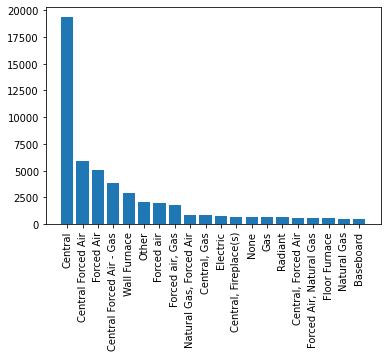

In [32]:
plot_text_series_value_counts(text_df['Heating'])

In [33]:
def extract_key_words(series: pd.Series):
    """
    从序列中抽取关键字
    """
    # 将序列所有文字拼接为一个大文本
    text = arr_to_one_text(series.unique().tolist())
    # 按照特殊符号分割为关键词
    short_text_list = re.split(r'[^A-Za-z0-9_\s]+', text)
    short_text_list = [i.strip() for i in short_text_list]
    # 关键词去重
    key_str_arr = pd.Series(short_text_list).unique()

    # 对关键词进行类别编码
    key_words_dict = dict()
    counter = 1
    for item in key_str_arr:
        if item.lower() not in key_words_dict:
            key_words_dict[item.lower()] = counter
            counter += 1
    return key_words_dict

In [34]:
def text_2_class(text: str, key_words_dict: dict):
    """
        文本转类别
    """
    class_set = set()
    if text is None or pd.isna(text):
        text = ''
    _text_list = re.split(r'[^A-Za-z0-9_\s]+', text)
    for i in _text_list:
        i = i.strip().lower()
        if i in key_words_dict:
            class_set.add(str(key_words_dict[i]))
    if len(class_set) == 0:
        return ['0']
    return list(sorted(class_set))

In [35]:
def series_to_multi_hot(series: pd.Series):
    """
        转 multi hot 编码
    """
    # 抽取关键字类别字典
    key_words_dict = extract_key_words(series)
    
    # 生成muti_hot相应尺寸的zero_dataframe
    zero_list = [0] * len(series)
    series_name = series.name
    data_dict = dict()
    for i in range(len(key_words_dict)):
        data_dict[f'{series_name}_{i}'] = zero_list
    multi_hot_df = pd.DataFrame(data_dict)
    
    # 将拥有的类别标记在对应的muti hot列中
    for data_i, data_str in series.items():
        # 文字转类别
        class_list = text_2_class(data_str, key_words_dict)
        for i in class_list:
            class_name = f'{series_name}_{i}'
            multi_hot_df.loc[data_i, class_name] = 1  
    return multi_hot_df

In [36]:
# multi_hot_df = None
# for name in text_name_list:
#     print(name)
#     if multi_hot_df is None:
#         multi_hot_df = series_to_multi_hot(text_df[name])
#     else:
#         multi_hot_df = pd.concat([multi_hot_df, series_to_multi_hot(text_df[name])], axis=1)

In [37]:
# multi_hot_df.shape

In [38]:
# 数值数据标准化
numeric_df = np.log(numeric_df + 1)
numeric_df = (numeric_df - numeric_df.mean()) / numeric_df.std()
# 标准化后，缺失值填充0
numeric_df = numeric_df.fillna(0)

In [39]:
numeric_df.shape

(79062, 20)

In [40]:
one_hot_df = pd.get_dummies(one_hot_df, dummy_na=True, dtype=int)
one_hot_df.shape

(79062, 1298)

In [41]:
# all_df = pd.concat([numeric_df, multi_hot_df], axis=1)
# del numeric_df
# del multi_hot_df
# all_df = pd.concat([all_df, one_hot_df], axis=1)
# del one_hot_df


all_df = pd.concat([numeric_df, one_hot_df], axis=1)
del one_hot_df
del numeric_df

all_df.shape

(79062, 1318)

In [42]:
n_train = train_df.shape[0]
train_data = torch.tensor(all_df.iloc[:n_train].values, dtype=torch.float32)
test_data = torch.tensor(all_df.iloc[n_train:].values, dtype=torch.float32)
train_labels = torch.tensor(train_df['Sold Price'].values.reshape(-1, 1), dtype=torch.float32)

In [43]:
train_data.shape, test_data.shape

(torch.Size([47436, 1318]), torch.Size([31626, 1318]))

In [44]:
train_data[:2, :], train_labels[:2, :]

(tensor([[ 0.0598, -5.3786, -3.6510,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0114, -0.4462, -0.2218,  ...,  0.0000,  0.0000,  0.0000]]),
 tensor([[3825000.],
         [ 505000.]]))

In [45]:
loss = nn.MSELoss()
in_features = train_data.shape[1]

In [146]:
def get_net():
    net = nn.Sequential(
        nn.Linear(in_features, 512),
        nn.ReLU(),
        nn.Linear(512, 1)
    )
    return net

In [147]:
def log_rmse(net, x, y):
    """取对数，得到均方根误差"""
    # 对y值设置上限和下限
    # y_hat = torch.clamp(net(x), 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(net(x) + 1), torch.log(y + 1)))
    rmse.requires_grad_(True)
    return rmse

In [148]:
def train(net, train_data, train_labels, test_data, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_data_iter = utils.load_array((train_data, train_labels), batch_size)
    # 这里使用的是Adam优化算法
    optimizer = torch.optim.Adam(net.parameters(),
                                 lr = learning_rate,
                                 weight_decay = weight_decay)
    for epoch in range(num_epochs):
        for X, y in train_data_iter:
            optimizer.zero_grad()
            l = loss(net(X), y)
            # l = log_rmse(net, X, y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_data, train_labels).item())
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_data, test_labels).item())
            print(f'---epoch: {epoch + 1}/{num_epochs}, 训练log_rmse: {float(train_ls[-1]):f}, '
                  f'验证log_rmse: {float(test_ls[-1]):f}')
        else:
            print(f'---epoch: {epoch + 1}/{num_epochs}, log_rmse: {float(train_ls[-1]):f}')
    return train_ls, test_ls

In [149]:
def get_k_fold_data(k, i, X, y):
    """
        k折交叉验证
    """
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid

In [150]:
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size):
    train_loss_sum, valid_loss_sum = 0, 0
    for i in range(k):
        print(f'第{i + 1}折')
        _X_train, _y_train, _X_valid, _y_valid = get_k_fold_data(k, i, X_train, y_train)
        net = get_net()
        train_ls, valid_ls = train(net, _X_train, _y_train, _X_valid, _y_valid, num_epochs, 
                                   learning_rate, weight_decay, batch_size)
        train_loss_sum += train_ls[-1]
        valid_loss_sum += valid_ls[-1]
        print(f'第{i + 1}折，训练log_rmse: {float(train_ls[-1]):f}, '
              f'验证log_rmse: {float(valid_ls[-1]):f}')
    return train_loss_sum / k, valid_loss_sum / k

In [151]:
k, num_epochs, lr, weight_decay, batch_size = 5, 40, 0.25, 0, 128
train_l, valid_l = k_fold(k, train_data, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print(f'END, {k}折平均训练log_rmse: {float(train_l):f}, '
      f'平均验证log_rmse: {float(valid_l):f}')

第1折
---epoch: 1/40, 训练log_rmse: 0.634777, 验证log_rmse: 0.592012
---epoch: 2/40, 训练log_rmse: 0.678325, 验证log_rmse: 0.622691
---epoch: 3/40, 训练log_rmse: 0.713147, 验证log_rmse: 0.656280
---epoch: 4/40, 训练log_rmse: 0.709878, 验证log_rmse: 0.662703
---epoch: 5/40, 训练log_rmse: 0.683457, 验证log_rmse: 0.641831
---epoch: 6/40, 训练log_rmse: 0.656117, 验证log_rmse: 0.626155
---epoch: 7/40, 训练log_rmse: 0.622751, 验证log_rmse: 0.591610
---epoch: 8/40, 训练log_rmse: 0.601773, 验证log_rmse: 0.546602
---epoch: 9/40, 训练log_rmse: 0.581293, 验证log_rmse: 0.533840
---epoch: 10/40, 训练log_rmse: 0.564120, 验证log_rmse: 0.519802
---epoch: 11/40, 训练log_rmse: 0.548827, 验证log_rmse: 0.511074
---epoch: 12/40, 训练log_rmse: 0.536217, 验证log_rmse: 0.501321
---epoch: 13/40, 训练log_rmse: 0.520509, 验证log_rmse: 0.489231
---epoch: 14/40, 训练log_rmse: 0.511320, 验证log_rmse: 0.476918
---epoch: 15/40, 训练log_rmse: 0.503056, 验证log_rmse: 0.470179
---epoch: 16/40, 训练log_rmse: 0.499862, 验证log_rmse: 0.469648
---epoch: 17/40, 训练log_rmse: 0.490244, 验证log_

In [152]:
net = get_net()
train_ls, _ = train(net, train_data, train_labels, None, None, num_epochs, lr, weight_decay, batch_size)
print(f'训练log_rmse：{float(train_ls[-1]):f}')

---epoch: 1/40, log_rmse: 0.716325
---epoch: 2/40, log_rmse: 0.641057
---epoch: 3/40, log_rmse: 0.587868
---epoch: 4/40, log_rmse: 0.552984
---epoch: 5/40, log_rmse: 0.548807
---epoch: 6/40, log_rmse: 0.533967
---epoch: 7/40, log_rmse: 0.526619
---epoch: 8/40, log_rmse: 0.507974
---epoch: 9/40, log_rmse: 0.496060
---epoch: 10/40, log_rmse: 0.479378
---epoch: 11/40, log_rmse: 0.379463
---epoch: 12/40, log_rmse: 0.267018
---epoch: 13/40, log_rmse: 0.249383
---epoch: 14/40, log_rmse: 0.236299
---epoch: 15/40, log_rmse: 0.230558
---epoch: 16/40, log_rmse: 0.223049
---epoch: 17/40, log_rmse: 0.230365
---epoch: 18/40, log_rmse: 0.221672
---epoch: 19/40, log_rmse: 0.225833
---epoch: 20/40, log_rmse: 0.222141
---epoch: 21/40, log_rmse: 0.218495
---epoch: 22/40, log_rmse: 0.215064
---epoch: 23/40, log_rmse: 0.214381
---epoch: 24/40, log_rmse: 0.212967
---epoch: 25/40, log_rmse: 0.210525
---epoch: 26/40, log_rmse: 0.211105
---epoch: 27/40, log_rmse: 0.212774
---epoch: 28/40, log_rmse: 0.209820
-

In [153]:
preds = net(test_data).detach().numpy()

In [154]:
preds.shape

(31626, 1)

In [155]:
preds_df = pd.DataFrame(preds, columns=['Sold Price'])
preds_df.head(5)

,Sold Price
0,8.845312e+05
1,3.566403e+05
2,8.658886e+05
3,8.930631e+05
4,1.139730e+06


In [156]:
submission = pd.concat([test_df['Id'], preds_df['Sold Price']], axis=1)
submission.to_csv((data_dir_path / 'submission.csv').as_posix(), index=False)